# Question 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'

Define appropriate constants.

In [2]:
e0 = 611
R = 8.314
L = 2.45 * 10**6
mv = 18/1000
md = 29/1000
T0 = 273
d = 2
g = 9.81
pmsl = 1013*100

Functions for converting between Kelvin and Celcius, and function for computing saturation vapour pressure.

In [3]:
def to_K(T):
    return T+273.15
def to_C(T):
    return T-273.15

def e_s(T):
    return e0*np.exp((mv*L/R)*(1/T0-1/T))

Create an array of temperatures between $-20^\circ C$ and $40^\circ C$ 

In [4]:
T = to_K(np.linspace(-20, 40, 1000))

## Part E

Compute $\delta p$ over the range of temperature above.

In [5]:
del_p = (md*g*d*pmsl/R)*(1/T)

Plot

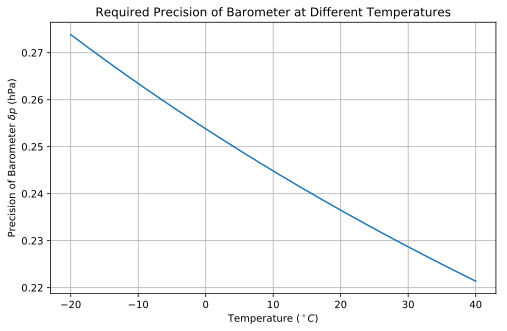

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(8,5))

ax.plot(to_C(T), del_p/100)
ax.set_xlabel('Temperature ($^\circ C$)')
ax.set_ylabel('Precision of Barometer $\delta p$ (hPa)')
ax.set_title('Required Precision of Barometer at Different Temperatures')
ax.grid()

## Part F

Function for computing molar mass of air at different temperatures.

In [7]:
def mass(T, RH):
    return md -(RH*e_s(T)/pmsl)*(md-mv) 

Relative humidities considered.

In [8]:
RHs = [0.25, 0.50, 0.75, 0.95]

Comput values of $\delta p$ at all relative humidities.

In [9]:
del_ps = [(mass(T, RH)*g*d*pmsl/R)*(1/T) for RH in RHs]

Plot.

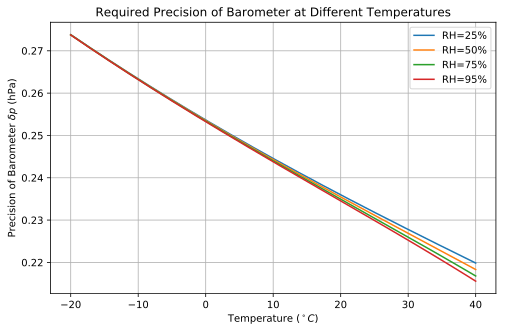

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(8,5))

ax.plot(to_C(T), del_ps[0]/100, label='RH=25%')
ax.plot(to_C(T), del_ps[1]/100, label='RH=50%')
ax.plot(to_C(T), del_ps[2]/100, label='RH=75%')
ax.plot(to_C(T), del_ps[3]/100, label='RH=95%')

ax.set_xlabel('Temperature ($^\circ C$)')
ax.set_ylabel('Precision of Barometer $\delta p$ (hPa)')
ax.set_title('Required Precision of Barometer at Different Temperatures')
ax.grid()

ax.legend()

plt.show()